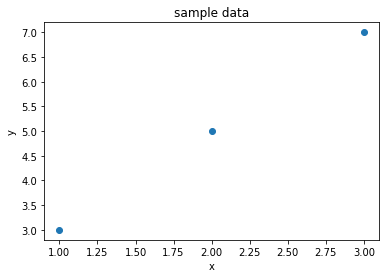

가중치 w = 2.0
절편 b = 1.0


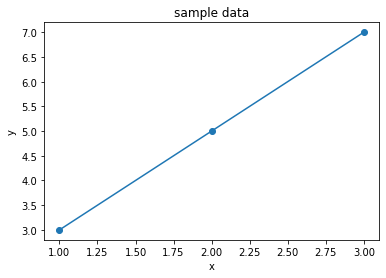

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# y = 2x + 1 함수를 형성하기 위한 값 배분
x_train = np.linspace(1,3,3)
y_train = np.linspace(3,7,3)

# 산점도 시각화
plt.scatter(x_train, y_train)
plt.title('sample data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

mu_x = np.mean(x_train)
mu_y = np.mean(y_train)

# 최소제곱법 시행
divisor = sum([(mu_x - i) ** 2 for i in x_train])
d = 0 
for i in range(len(x_train)):
    d += (x_train[i] - mu_x) * (y_train[i] - mu_y)
dividend = d

# 기울기, 절편 구하기
w = dividend / divisor
b = mu_y - (mu_x * w)

print(f'가중치 w = {w}')
print(f'절편 b = {b}')

y_hat = w * x_train + b

# 산점도 시각화
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat)
plt.title('sample data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


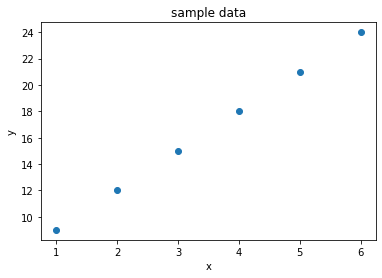

epoch = 0, 기울기(가중치) =  3.3250, 절편 =  0.8250
epoch = 100, 기울기(가중치) =  3.4651, 절편 =  4.0088
epoch = 200, 기울기(가중치) =  3.1860, 절편 =  5.2037
epoch = 300, 기울기(가중치) =  3.0744, 절편 =  5.6816
epoch = 400, 기울기(가중치) =  3.0297, 절편 =  5.8727
epoch = 500, 기울기(가중치) =  3.0119, 절편 =  5.9491
epoch = 600, 기울기(가중치) =  3.0048, 절편 =  5.9796
epoch = 700, 기울기(가중치) =  3.0019, 절편 =  5.9919
epoch = 800, 기울기(가중치) =  3.0008, 절편 =  5.9967
epoch = 900, 기울기(가중치) =  3.0003, 절편 =  5.9987


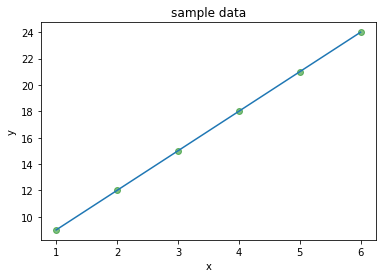

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# x, y 샘플 데이터 형성
x_df = np.linspace(1,6,6)
y_df = np.linspace(9,24,6)

# 샘플 데이터 시각화
plt.scatter(x_df, y_df)
plt.title('sample data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 가중치, 절편 변수 생성
w = 0
b = 0

# 학습률 지정 및 epoch(반복횟수) 지정
learning_rate = 0.05
epochs = 1000

# 반복 작업 시행
for i in range(epochs):
    y_hat = w * x_df + b
    error = y_df - y_hat
    
    # 오차 함수를 w,b에 대해 미분한 값
    w_diff = -(1/len(x_df)) * sum(x_df * error)
    b_diff = -(1/len(x_df)) * sum(error)
    
    # 가중치 업데이트
    w = w - learning_rate * w_diff
    b = b - learning_rate * b_diff
    
    # 100의 배수로 시행할 때마다 반복횟수와 학습한 기울기, 절편을 출력함
    if i % 100 ==0:
        print(f'epoch = {i}, 기울기(가중치) = {w : .4f}, 절편 = {b : .4f}')

# 업데이트된 w,b로 예측시행
y_pred = w * x_df + b

# 예측된 데이터와 기존의 산점도 시각화
plt.scatter(x_df, y_df, c = 'g', alpha= .5)
plt.plot(x_df, y_df)
plt.title('sample data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Epoch 1/100
1/1 [==============================] - 1s 548ms/step - loss: 0.8387
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 0.5802
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3718
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2134
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1037
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0390
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0135
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 9/100
1/1 [==============================] - 0s 53ms/step - loss: 0.0423
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0740
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - loss: 0.1032
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1232
Epoch 13/100
1/1 [==============================] -

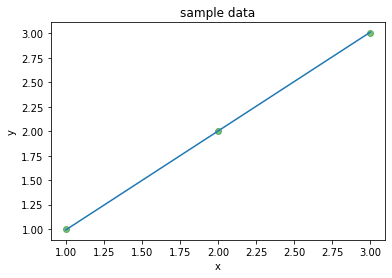

In [43]:
import tensorflow as tf
import numpy as np

# 임의의 값 생성
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# seed 부여
tf.random.set_seed(2022)

# 가중치와 편향은 모르는 값으로 가정 (임의의 값 부여)
# random.normal(shape, mean, std, dtype, seed)로 구성되어 있음
W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# 회귀식 가정
y_hat = x_train * W + b

# optimizer (최적화 함수 설정)
sgd = tf.keras.optimizers.Adam(learning_rate=0.05)

# 모델 형성 (input은 feature 1개, loss는 MSE로 설정, 반복회수 100번 시행)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim = 1))
model.compile(loss='mean_squared_error', optimizer=sgd)
model.fit(x_train,y_train,epochs=100)

# 모델 결과 출력
plt.scatter(x_train, y_train, c = 'g', alpha= .5)
plt.plot(x_train ,model.predict(x_train))
plt.title('sample data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
import yfinance as yf

# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','^KS11'}, '2021-01-01', '2022-03-01')
stock_price

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               005930.KS        ^KS11 005930.KS        ^KS11 005930.KS   
Date                                                                     
2021-01-04  81511.242188  2944.449951   83000.0  2944.449951   84400.0   
2021-01-05  82395.093750  2990.570068   83900.0  2990.570068   83900.0   
2021-01-06  80725.585938  2968.209961   82200.0  2968.209961   84500.0   
2021-01-07  81413.031250  3031.679932   82900.0  3031.679932   84200.0   
2021-01-08  87207.203125  3152.179932   88800.0  3152.179932   90000.0   
...                  ...          ...       ...          ...       ...   
2022-02-22  74300.000000  2706.790039   74300.0  2706.790039   74300.0   
2022-02-23  74300.000000  2719.530029   74300.0  2719.530029   74300.0   
2022-02-24  71500.000000  2648.800049   71500.0  2648.800049   72300.0   
2022-02-25  71900.000000  2676.760010   71900.0  2676.760010   72600.0   
2022-02-28  71900.000000  2699.179932   71900.0  2699.179932   71900.0   

                              Low                   Open               \
                  ^KS11 005930.KS        ^KS11 005930.KS        ^KS11   
Date                                                                    
2021-01-04  2946.540039   80200.0  2869.110107   81000.0  2874.500000   
2021-01-05  2990.570068   81600.0  2921.840088   81600.0  2943.669922   
2021-01-06  3027.159912   82100.0  2961.370117   83300.0  2993.340088   
2021-01-07  3055.280029   82700.0  2980.750000   82800.0  2980.750000   
2021-01-08  3161.110107   83000.0  3040.110107   83300.0  3040.110107   
...                 ...       ...          ...       ...          ...   
2022-02-22  2721.840088   74300.0  2690.090088   74300.0  2705.080078   
2022-02-23  2729.560059   74300.0  2705.310059   74300.0  2727.429932   
2022-02-24  2694.550049   71300.0  2642.629883   72300.0  2689.280029   
2022-02-25  2694.810059   71900.0  2665.959961   72100.0  2678.469971   
2022-02-28  2699.179932   71900.0  2658.250000   71900.0  2663.000000   

              Volume           
           005930.KS    ^KS11  
Date                           
2021-01-04  38655276  1026500  
2021-01-05  35335669  1519900  
2021-01-06  42089013  1793400  
2021-01-07  32644642  1524700  
2021-01-08  59013307  1297900  
...              ...      ...  
2022-02-22         0   648100  
2022-02-23         0   537700  
2022-02-24  15759283   925900  
2022-02-25  13168484   664100  
2022-02-28         0   613300  

[285 rows x 12 columns]

Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 10110504960.0000
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 4879108608.0000
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1750285184.0000
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 364308736.0000
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 17156724.0000
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 31408362.0000
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 55706844.0000
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 33187798.0000
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 8217910.0000
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 341031.0312
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 924818.1250
Epoch 12/100
8/8 [==============================] - 0s 4ms/s

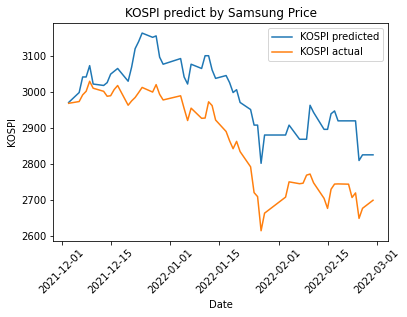

In [95]:
import tensorflow as tf
import numpy as np
import pandas as pd
tf.random.set_seed(2022)

# 주가 데이터에서 80%는 훈련, 20%는 검증으로 나눔
x_train = stock_price['Close']['005930.KS'][:-57]
y_train = stock_price['Close']['^KS11'][:-57]
x_test = stock_price['Close']['005930.KS'][-57:]
y_test = stock_price['Close']['^KS11'][-57:]
test = pd.concat([pd.DataFrame(x_test),pd.DataFrame(y_test)], axis=1)

# optimizer (최적화 함수 설정)
adam = tf.keras.optimizers.Adam(learning_rate=0.05)

# 모델 형성 (input은 feature 1개, loss는 MSE로 설정, 반복회수 100번 시행)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim = 1)) 
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(x_train,y_train,epochs=100)

# 모델 예측값 dataset 형성
pred = pd.concat([test, pd.DataFrame(model.predict(x_test), index = test.index)], axis =1)

# 모델 결과 출력
plt.plot(pred[0], label='KOSPI predicted')
plt.plot(pred['^KS11'], label='KOSPI actual')
plt.title('KOSPI predict by Samsung Price')
plt.legend()
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('KOSPI')
plt.show()